# Initial Single Cell Peak

This is an initial peak at the single cell data for ovary.

In [1]:
import os
import sys
from pathlib import Path

from IPython.display import display, HTML, Markdown
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Project level imports
from larval_gonad_ovary.notebook import Nb
from larval_gonad_ovary.plotting import make_figs
from larval_gonad_ovary.config import memory

In [2]:
# Setup notebook
nbconfig = Nb.setup_notebook()

last updated: 2018-08-13 
Git hash: b451483745a532aadb8fbdfcfea6b61a9645da45


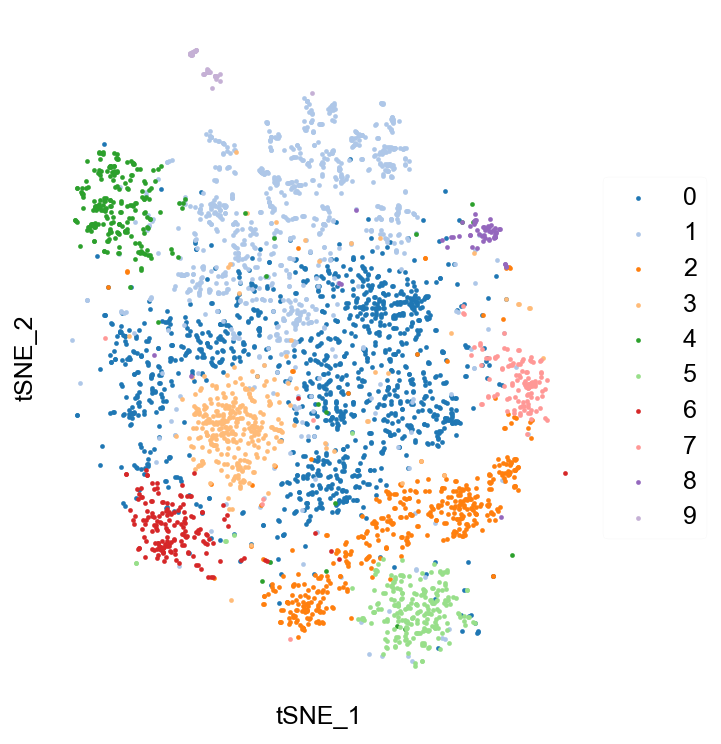

In [34]:
res4 = pd.read_parquet('../scrnaseq-wf/data/clusters.res.0.4.parquet')
tsne = pd.read_parquet('../scrnaseq-wf/data/tsne.parquet')

n_clus = len(res4.cluster.unique())
cmapper = dict(zip(range(n_clus), sns.color_palette('tab20', n_colors=n_clus)))

fig, ax = plt.subplots()
for g, dd in tsne.join(res4).groupby('cluster'):
    dd.plot.scatter('tSNE_1', 'tSNE_2', ax=ax, c=cmapper[g], s=5, label=g)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
sns.despine(ax=ax, bottom=True, top=True, left=True, right=True)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])
ax.set_aspect('equal')

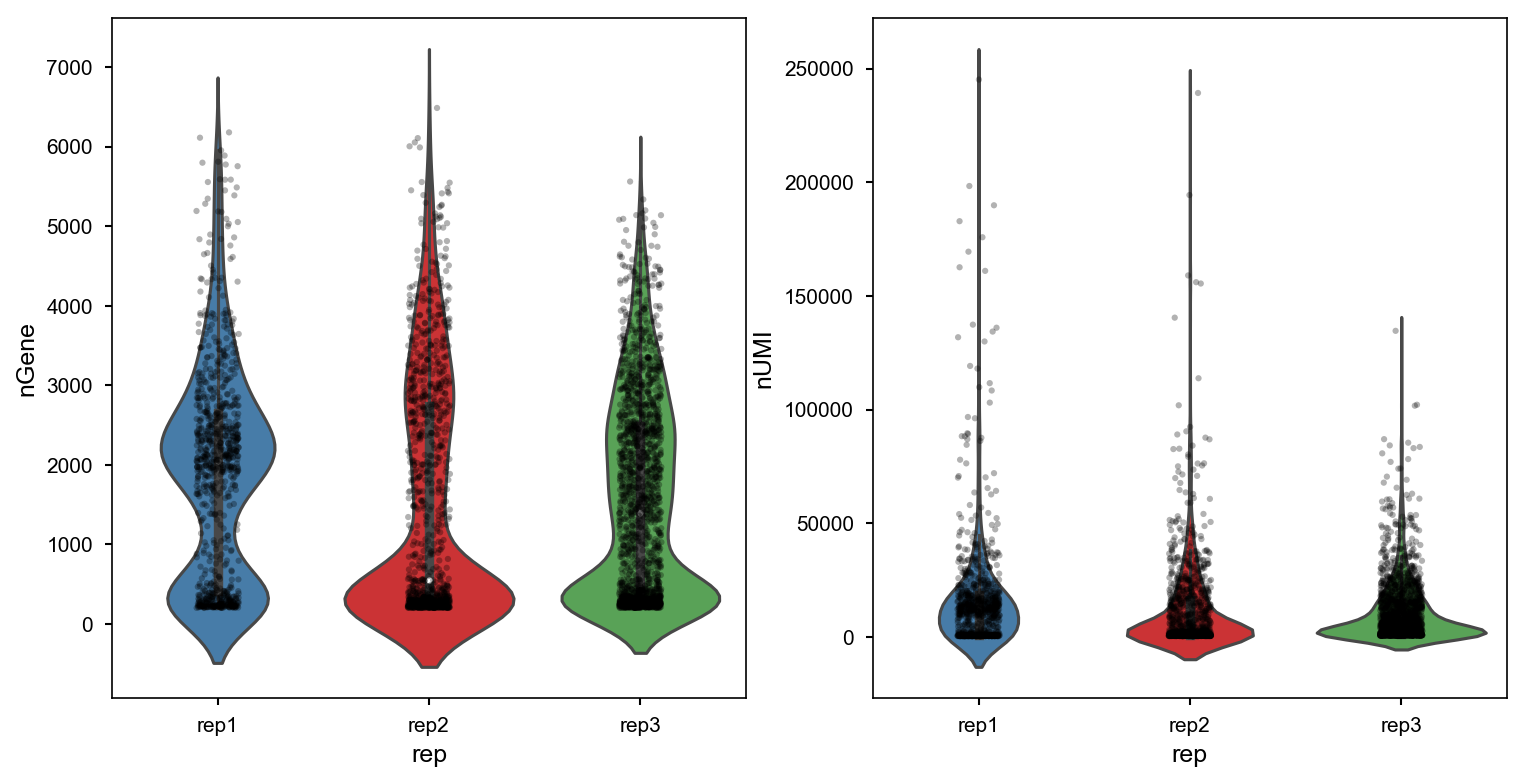

In [61]:
metadata = pd.read_parquet('../scrnaseq-wf/data/metadata.parquet')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=plt.figaspect(1/2))
sns.violinplot(x='rep', y='nGene', data=metadata, ax=ax1)
sns.stripplot(x='rep', y='nGene', data=metadata, color='k', jitter=True, s=3, alpha=.3, ax=ax1)

sns.violinplot(x='rep', y='nUMI', data=metadata, ax=ax2)
sns.stripplot(x='rep', y='nUMI', data=metadata, color='k', jitter=True, s=3, alpha=.3, ax=ax2)

In [63]:
from larval_gonad_ovary.cell_selection import cellranger_umi
from larval_gonad_ovary.plotting import plot_barcode_rank

In [88]:
def get_umi(rep):
    print(f'rep {rep}')
    umi = cellranger_umi(f'../scrnaseq-wf/data/scrnaseq_samples/ovary{rep}_force/outs/molecule_info.h5')
    dat = umi.groupby('cell_id').size()
    dat.name = 'nUMI'
    dat.sort_values(ascending=False, inplace=True)
    return dat.to_frame().assign(cellNum=range(1, dat.shape[0] + 1))

In [89]:
rep1 = get_umi(1)
rep2 = get_umi(2)
rep3 = get_umi(3)

rep 1
rep 2
rep 3


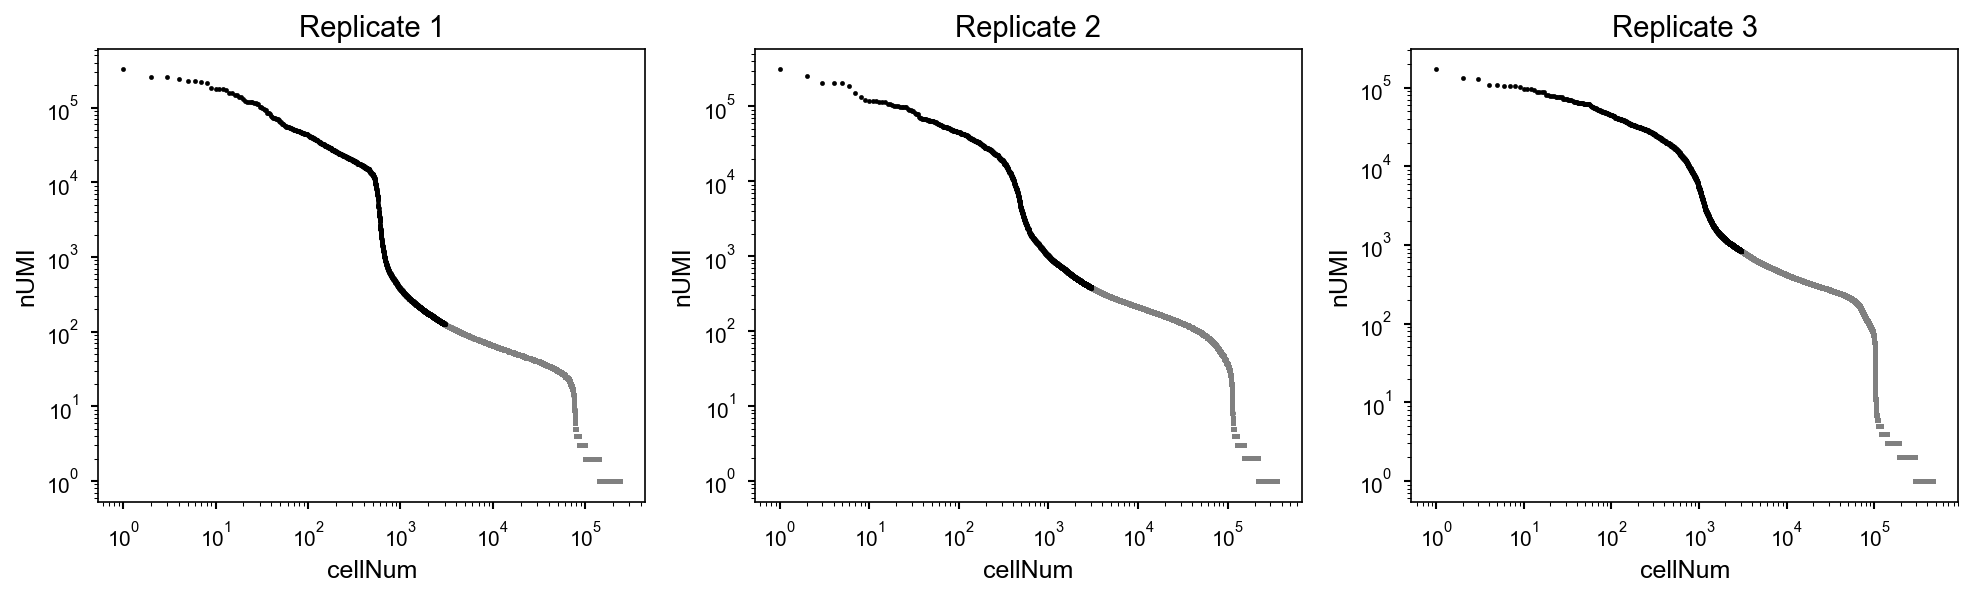

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=plt.figaspect(1/4))

defaults = dict(s=5, c='grey', alpha=.5)
rep1.plot.scatter('cellNum', 'nUMI', ax=ax1, **defaults)
rep2.plot.scatter('cellNum', 'nUMI', ax=ax2, **defaults)
rep3.plot.scatter('cellNum', 'nUMI', ax=ax3, **defaults)

defaults.update(dict(c='k', alpha=1))
rep1.head(3000).plot.scatter('cellNum', 'nUMI', ax=ax1, **defaults)
rep2.head(3000).plot.scatter('cellNum', 'nUMI', ax=ax2, **defaults)
rep3.head(3000).plot.scatter('cellNum', 'nUMI', ax=ax3, **defaults)

ax1.set_title('Replicate 1')
ax2.set_title('Replicate 2')
ax3.set_title('Replicate 3')

for ax in [ax1, ax2, ax3]:
    ax.set_xscale('log')
    ax.set_yscale('log')

In [9]:
tpm = pd.read_parquet('../scrnaseq-wf/data/tpm.parquet')
clusters = pd.read_parquet('../scrnaseq-wf/data/clusters.res.0.4.parquet')
tpm_cluster = tpm.T.join(clusters).groupby('cluster').sum().T

In [10]:
zscore = pd.read_parquet('../scrnaseq-wf/data/zscore_tpm.res.0.4.parquet')

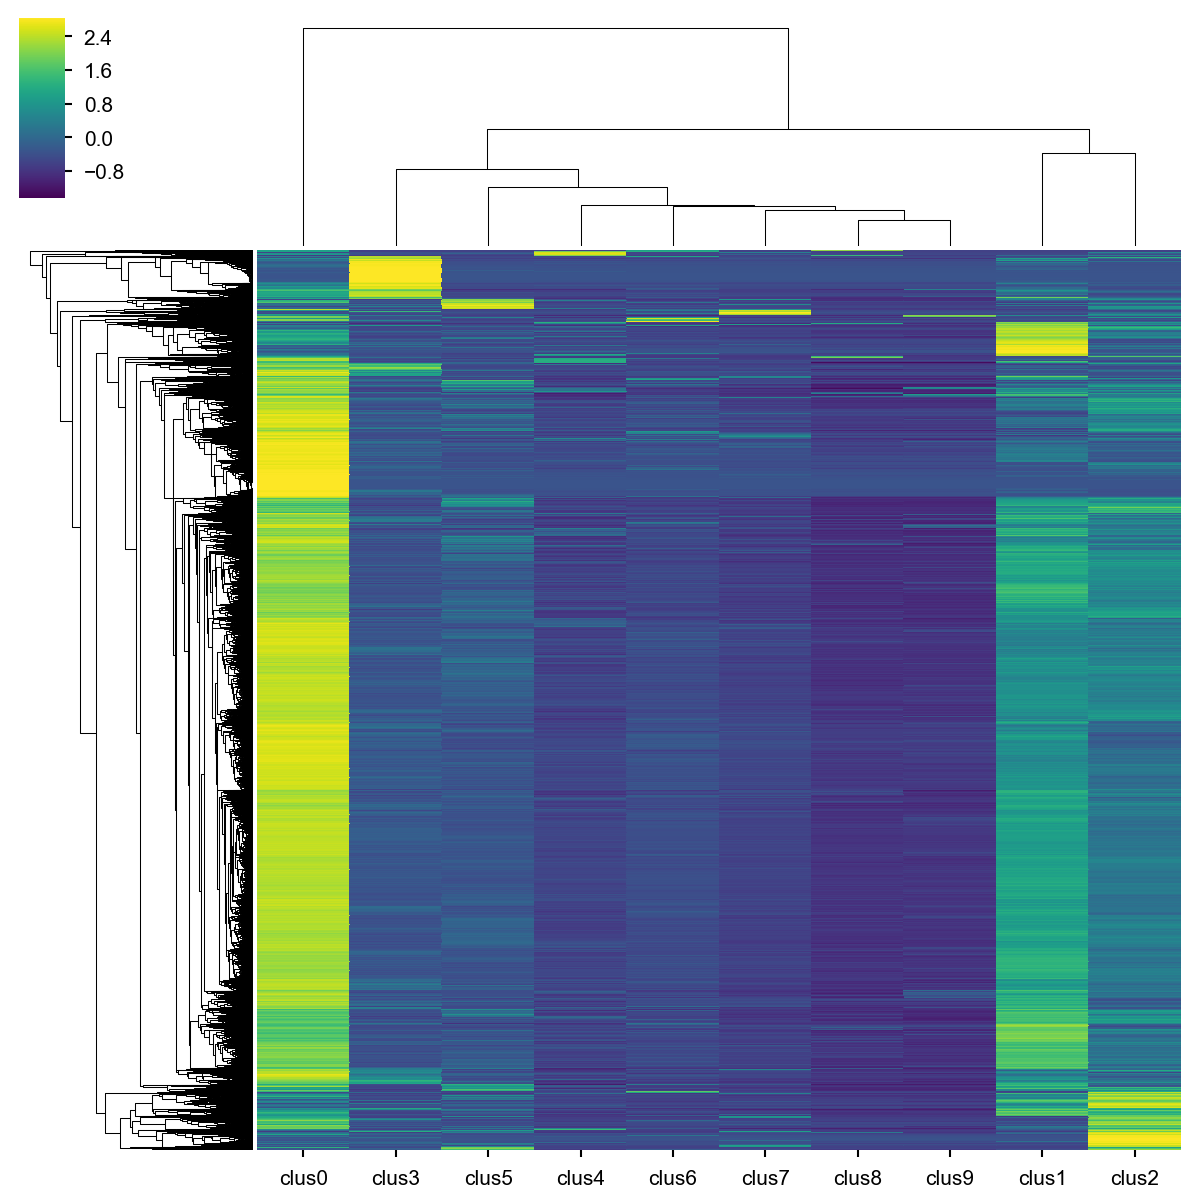

In [18]:
sns.clustermap(zscore, cmap='viridis', yticklabels=False)

In [21]:
sc = pd.read_parquet('../scrnaseq-wf/data/tpm.res.0.4.parquet')
bulk = pd.read_parquet('../bulk-wf/data/tpm.parquet')

In [23]:
df = sc.join(bulk)

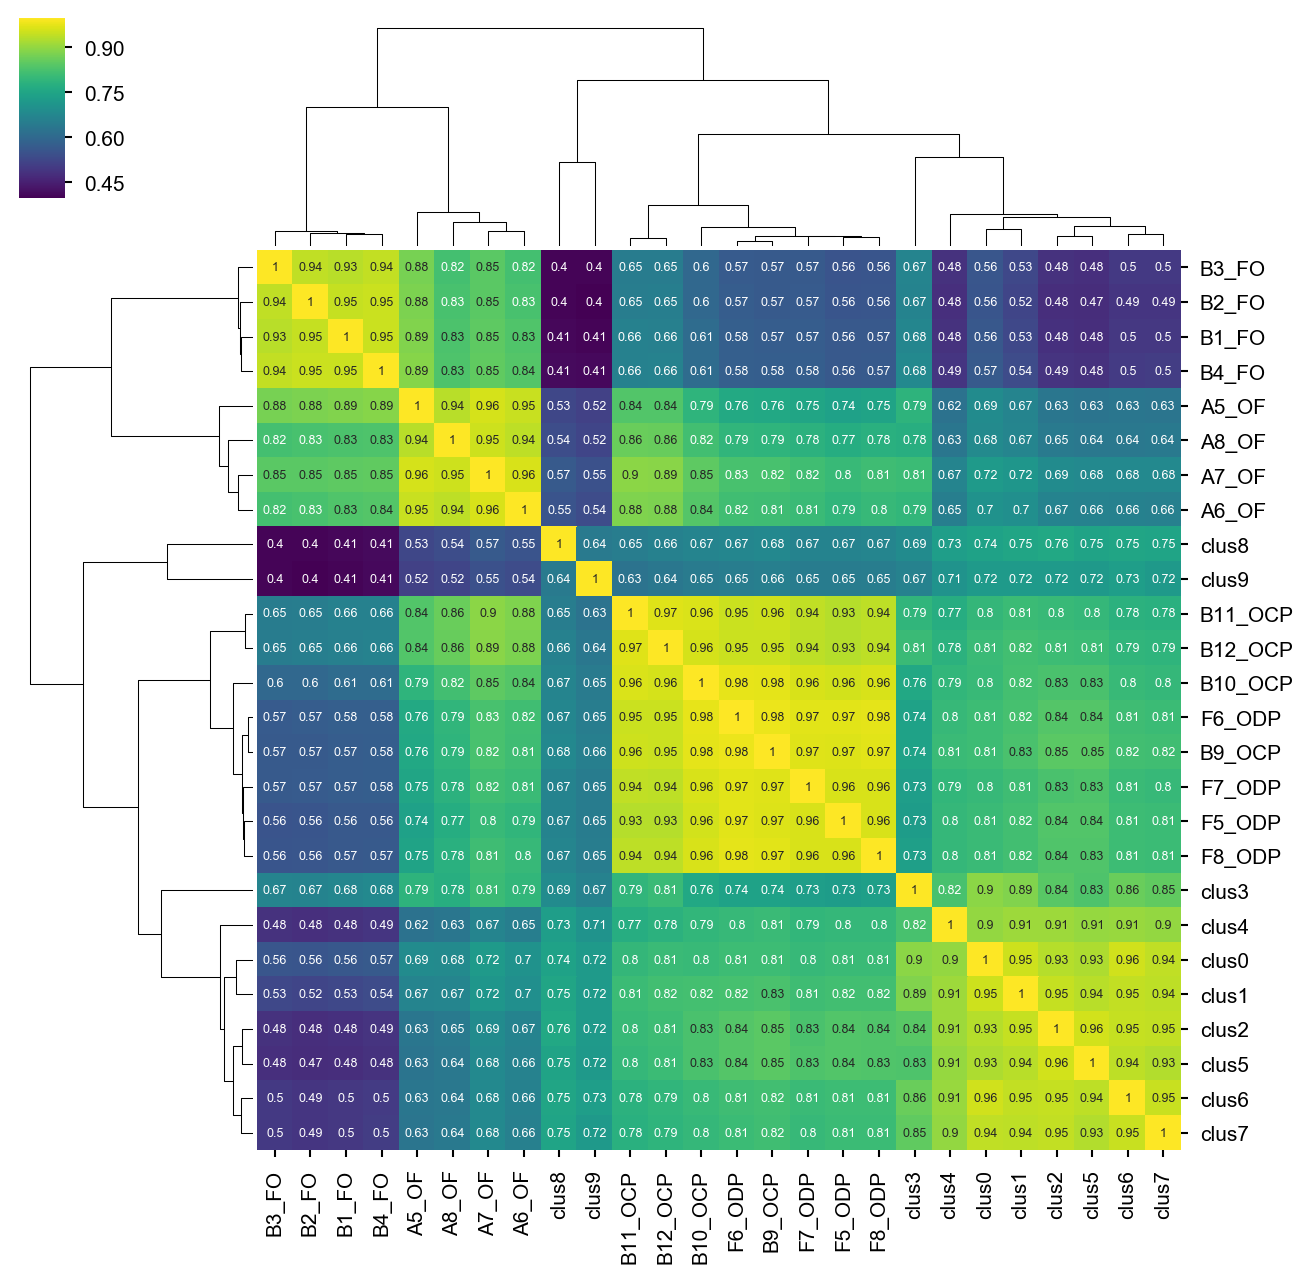

In [27]:
sns.clustermap(df.corr(method='spearman'), cmap='viridis', annot=True, annot_kws=dict(fontsize=6))

In [28]:
raw = pd.read_parquet('../scrnaseq-wf/data/raw.res.0.4.parquet')

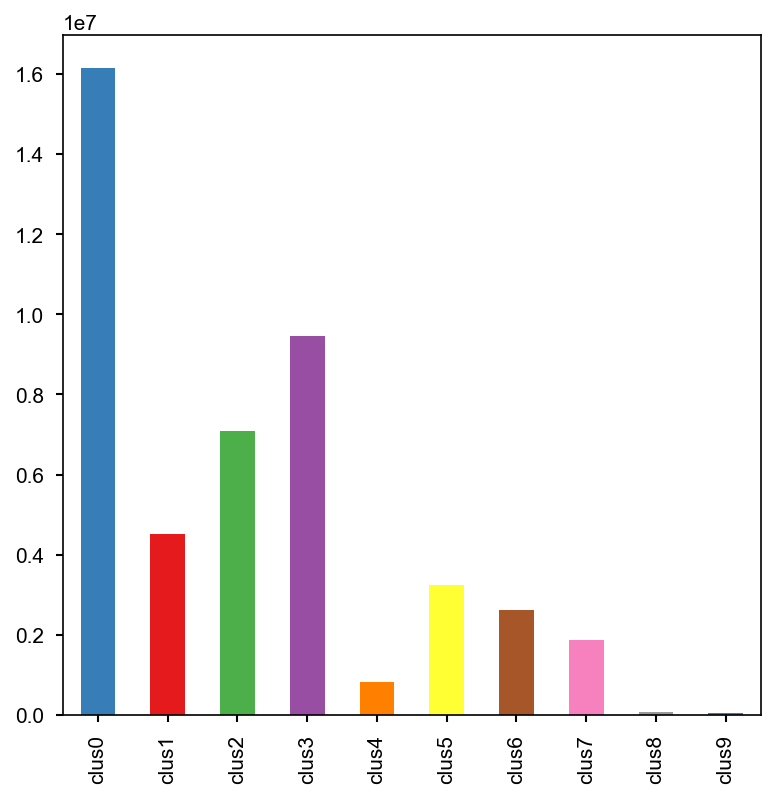

In [36]:
ax = raw.sum().plot.bar()

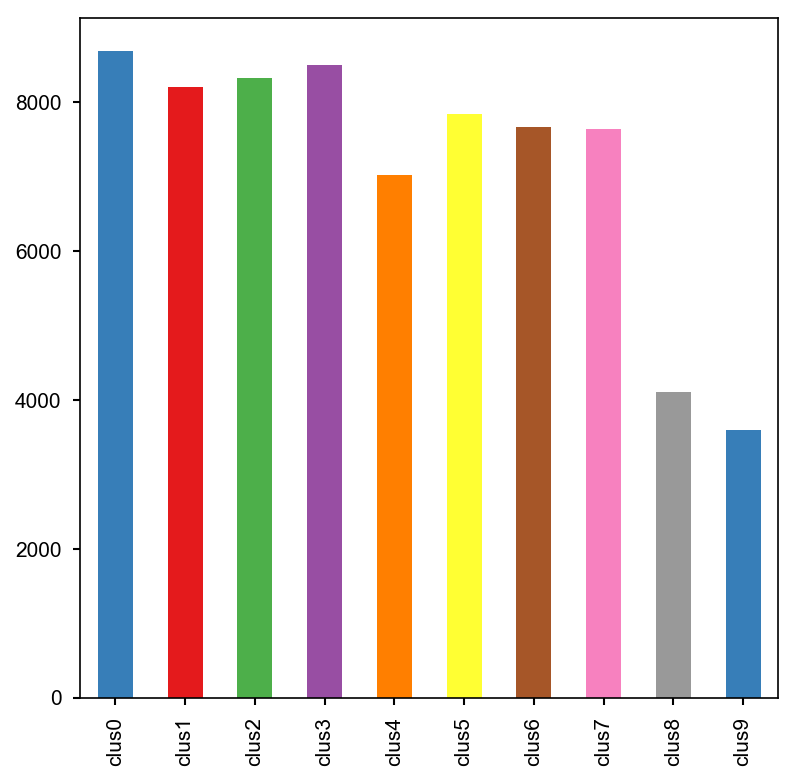

In [38]:
(raw > 0).sum().plot.bar()

In [39]:
raw = pd.read_parquet('../scrnaseq-wf/data/raw.parquet')
clusters = pd.read_parquet('../scrnaseq-wf/data/clusters.res.0.4.parquet')

In [40]:
raw.head()

,rep1_AAACGGGAGTACGTTC,rep1_AAACGGGCAACACGCC,rep1_AAACGGGCACAAGCCC,rep1_AAACGGGCAGCTGGCT,rep1_AAAGATGCAACAACCT,rep1_AAAGCAAAGTACTTGC,rep1_AAAGCAATCAAACGGG,rep1_AAAGCAATCTGCTTGC,rep1_AAAGTAGCATTGGGCC,rep1_AAATGCCCAGACGCAA,...,rep3_TTTGCGCAGCATCATC,rep3_TTTGCGCAGCCTATGT,rep3_TTTGCGCAGCGCCTCA,rep3_TTTGCGCAGGGTCGAT,rep3_TTTGCGCGTATGAAAC,rep3_TTTGTCAAGTTCGATC,rep3_TTTGTCACAATTGCTG,rep3_TTTGTCACATTACCTT,rep3_TTTGTCATCCAGTAGT,rep3_TTTGTCATCCCTCAGT
FBgn0031081,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
FBgn0053217,1,2,1,1,0,0,0,2,0,1,...,0,0,0,0,0,0,0,3,0,0
FBgn0052350,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
FBgn0024733,42,239,69,108,2,2,1,200,0,263,...,4,49,5,17,1,2,0,112,6,35
FBgn0040372,2,3,1,4,0,0,0,2,0,2,...,1,1,0,0,0,0,0,5,0,2


In [56]:
dfs = []
for g, dd in raw.T.join(clusters).groupby('cluster'):
    dat = dd.sum(axis=1)
    dat.name = 'num_reads'
    dfs.append(dat.to_frame().assign(cluster=g))
    
df = pd.concat(dfs)

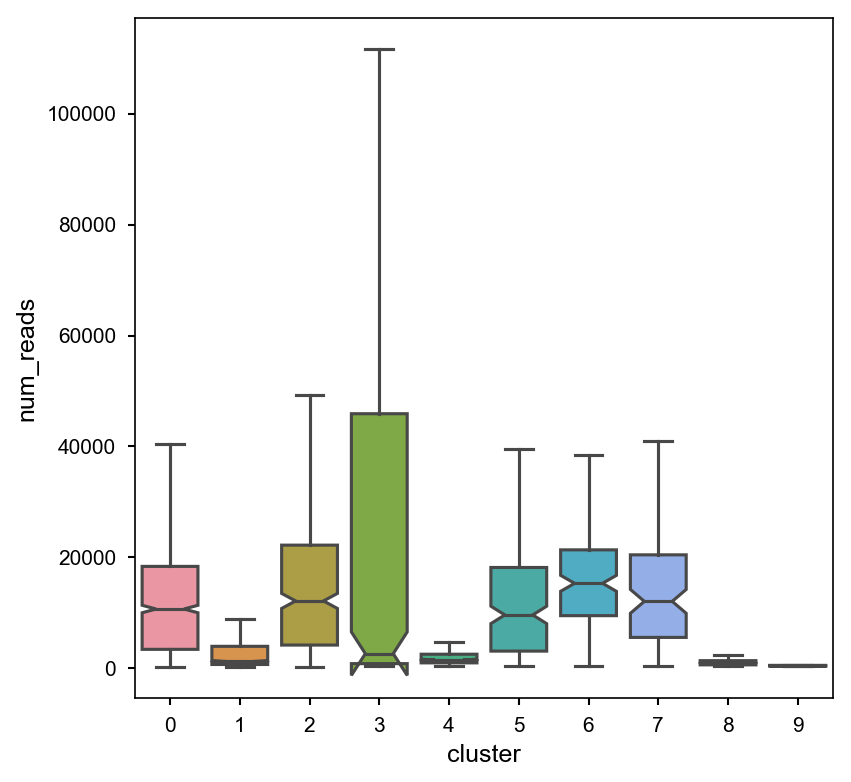

In [61]:
ax = sns.boxplot('cluster', 'num_reads', data=df, showfliers=False, notch=True)

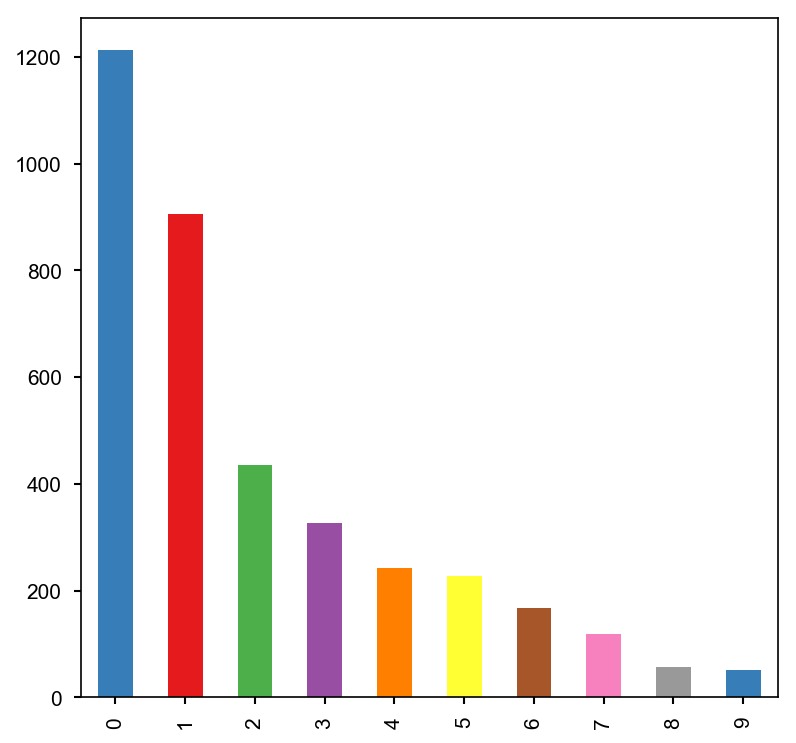

In [65]:
clusters.cluster.value_counts().plot.bar()

In [69]:
metadata = pd.read_parquet('../scrnaseq-wf/data/metadata.parquet')

In [75]:
dat = metadata.groupby(['res.0.4', 'rep']).size().to_frame().reset_index()

In [77]:
dat.columns = ['cluster', 'rep', 'num_cells']

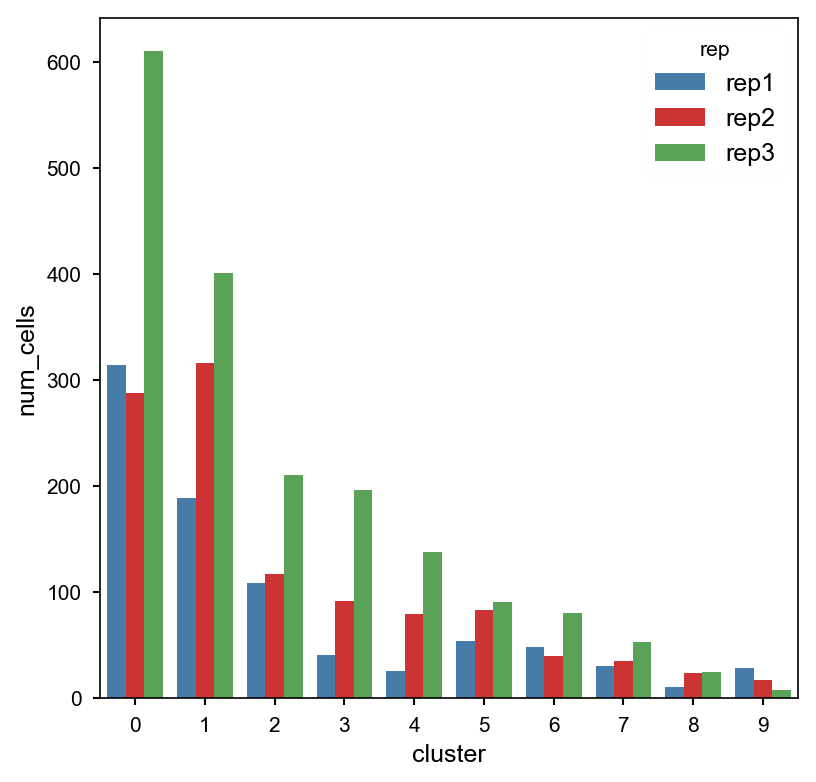

In [79]:
sns.barplot('cluster', 'num_cells', hue='rep', data=dat)

In [92]:
dat = metadata.groupby('rep').size().to_frame()
dat.columns = ['Number of cells']
dat.applymap(lambda x: '{:,}'.format(x))

,Number of cells
rep,
rep1,846
rep2,"1,088"
rep3,"1,810"


In [82]:
raw.shape

(8902, 3744)

In [84]:
metadata.shape

(3744, 7)

In [85]:
from larval_gonad_ovary.cell_selection import cellranger_counts

In [86]:
dat = cellranger_counts('../scrnaseq-wf/data/scrnaseq_samples/ovary1_force/outs/filtered_gene_bc_matrices_h5.h5')

In [89]:
dat.matrix.shape

(17473, 3000)